In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/reglab1.txt", sep="\t")
df

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102
...,...,...,...
195,2.917468,0.745790,0.073874
196,4.813905,0.474947,0.582424
197,6.419296,0.773870,0.636785
198,4.231917,0.049090,0.994537


In [3]:
feaures = ["x", "y"]
target = "z"

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_df, test_df = train_test_split(
    df,
    test_size=0.3,
    random_state=42,
)

In [6]:
df.describe()

,z,x,y
count,200.000000,200.000000,200.000000
mean,4.526593,0.505099,0.500915
std,1.896627,0.275199,0.297885
min,1.279172,0.012889,0.007156
25%,2.952748,0.267437,0.212382
50%,4.309908,0.509381,0.505285
75%,5.777935,0.732546,0.763352
max,9.569435,0.995119,0.994609


In [7]:
import itertools

In [8]:
all_combinations = [["x"], ["y"], ["x", "y"]]

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
results = []
for features in all_combinations:
    X = train_df[features]
    y = train_df[target]

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(test_df[features])

    r2 = r2_score(test_df[target], y_pred)
    mse = mean_squared_error(test_df[target], y_pred)
    n_features = len(features)

    results.append(
        {
            "Features": ", ".join(features),
            "R^2": r2,
            "MSE": mse,
            "Adjusted R^2": 1
            - (1 - r2)
            * (len(test_df[target]) - 1)
            / (len(test_df[target]) - n_features - 1),
        }
    )

In [11]:
model.coef_, model.intercept_

(array([4.13129522, 4.92074657]), np.float64(-0.018397884222508765))

In [12]:
results

[{'Features': 'x',
  'R^2': 0.3679912556826054,
  'MSE': 2.334674910895492,
  'Adjusted R^2': 0.35709455319437444},
 {'Features': 'y',
  'R^2': 0.5731020567661267,
  'MSE': 1.5769843796346048,
  'Adjusted R^2': 0.5657417474000255},
 {'Features': 'x, y',
  'R^2': 0.966750533806433,
  'MSE': 0.12282534889074943,
  'Adjusted R^2': 0.9655838858698167}]

In [13]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="Adjusted R^2", ascending=False)

,Features,R^2,MSE,Adjusted R^2
2,"x, y",0.966751,0.122825,0.965584
1,y,0.573102,1.576984,0.565742
0,x,0.367991,2.334675,0.357095


In [14]:
import matplotlib.pyplot as plt

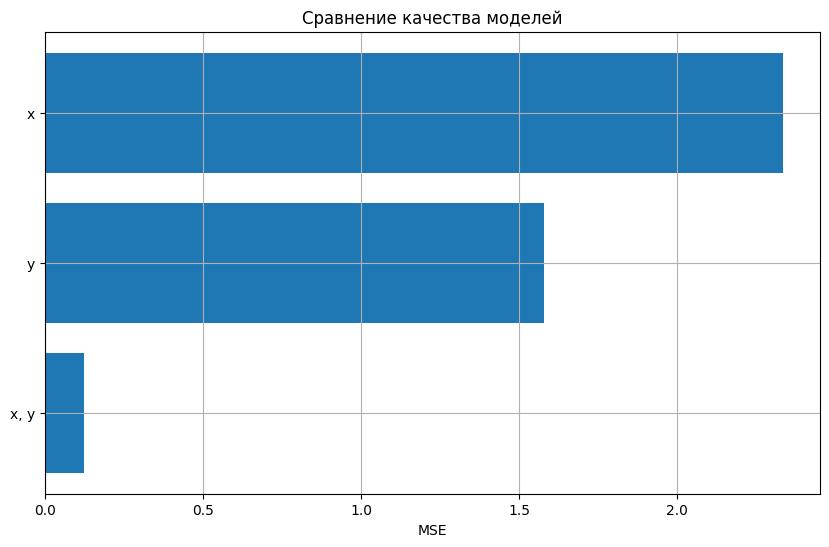

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(results_df["Features"], results_df["MSE"])
plt.xlabel("MSE")
plt.title("Сравнение качества моделей")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()